In [1]:
#Calculate the average AQI value per city
#Create bins for AQI values
#Calculate additional statistical features

#Calculate the average AQI value per city:group the dataframe by the 'City' column and calculate the mean AQI value
#for each city. This can provide a representation of the overall air quality in each city.



#Create bins for AQI values: Instead of using the raw AQI values,create bins or categories to represent different 
#levels of air quality. example, divide the AQI values into categories like 'Good', 'Moderate', 'Unhealthy', 
#'Very Unhealthy', and 'Hazardous'.we can use the pd.cut() function to create these bins based on predefined thresholds.





import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# Feature selection
df = df[['Country', 'City', 'AQI Value']]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'AQI Value')

# Feature Engineering
# Calculate average AQI value per city
city_average_aqi = df.groupby('City')['AQI Value'].mean().reset_index()
city_average_aqi.columns = ['City', 'Average AQI Value']

# Create bins for AQI values
aqi_bins = [0, 50, 100, 150, 200, 300, float('inf')]
aqi_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['AQI Category'] = pd.cut(df['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)

# Calculate additional statistical features
city_stats = df.groupby('City')['AQI Value'].agg(['min', 'max', 'std']).reset_index()
city_stats['AQI Range'] = city_stats['max'] - city_stats['min']
city_stats.columns = ['City', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']

# Merge the engineered features back into the main dataframe
df = pd.merge(df, city_average_aqi, on='City')
df = pd.merge(df, city_stats, on='City')

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Print the modified dataframe
print(df.head())


              Country              City  AQI Value AQI Category  \
0  Russian Federation        Praskoveya  -0.186657     Moderate   
1              Brazil  Presidente Dutra  -0.591615         Good   
2               Italy   Priolo Gargallo   0.420781     Moderate   
3              Poland         Przasnysz  -0.875086         Good   
4              France          Punaauia  -1.361037         Good   

   Average AQI Value   Min AQI   Max AQI  AQI Std  AQI Range  
0          -0.186657 -0.186657 -0.186657      NaN        0.0  
1          -0.591615 -0.591615 -0.591615      NaN        0.0  
2           0.420781  0.420781  0.420781      NaN        0.0  
3          -0.875086 -0.875086 -0.875086      NaN        0.0  
4          -1.361037 -1.361037 -1.361037      NaN        0.0  


C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [18]:
#print only the Bangladesh cities for the average AQI value, binning, and statistical calculations...FEATURE ENGINEERING

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# Feature selection
df = df[['Country', 'City', 'AQI Value']]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'AQI Value')

# Filter data for Bangladesh
df_bangladesh = df[df['Country'] == 'Bangladesh']

# Feature Engineering
# Calculate average AQI value per city
city_average_aqi = df_bangladesh.groupby('City')['AQI Value'].mean().reset_index()
city_average_aqi.columns = ['City', 'Average AQI Value']

# Create bins for AQI values
aqi_bins = [0, 50, 100, 150, 200, 300, float('inf')]
aqi_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df_bangladesh['AQI Category'] = pd.cut(df_bangladesh['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)

# Calculate additional statistical features
city_stats = df_bangladesh.groupby('City')['AQI Value'].agg(['min', 'max', 'std']).reset_index()
city_stats['AQI Range'] = city_stats['max'] - city_stats['min']
city_stats.columns = ['City', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']

# Merge the engineered features back into the main dataframe
df_bangladesh = pd.merge(df_bangladesh, city_average_aqi, on='City')
df_bangladesh = pd.merge(df_bangladesh, city_stats, on='City')

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df_bangladesh.select_dtypes(include='number').columns
df_bangladesh[num_cols] = scaler.fit_transform(df_bangladesh[num_cols])

scaler = StandardScaler()
num_cols = df_bangladesh.select_dtypes(include='number').columns
df_bangladesh[num_cols] = scaler.fit_transform(df_bangladesh[num_cols])

# Print the modified dataframe for Bangladesh cities
print(df_bangladesh)


       Country            City  AQI Value AQI Category  Average AQI Value  \
0   Bangladesh   Bhairab Bazar   2.148686    Unhealthy           2.148686   
1   Bangladesh        Jamalpur  -0.455782     Moderate          -0.455782   
2   Bangladesh      Jaipur Hat   0.805757     Moderate           0.805757   
3   Bangladesh      Nageshwari   0.276725     Moderate           0.276725   
4   Bangladesh        Lalmohan   1.212705    Unhealthy           1.212705   
5   Bangladesh     Mehendiganj   0.032556     Moderate           0.032556   
6   Bangladesh         Barisal  -1.635931         Good          -1.635931   
7   Bangladesh       Sunamganj  -1.554542         Good          -1.554542   
8   Bangladesh      Lakshmipur   0.642978     Moderate           0.642978   
9   Bangladesh     Narayanganj  -0.211613     Moderate          -0.211613   
10  Bangladesh           Dohar   0.398809     Moderate           0.398809   
11  Bangladesh      Baniachang   1.212705    Unhealthy           1.212705   

C:\Users\nh013\AppData\Local\Temp\ipykernel_6804\1169568571.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bangladesh['AQI Category'] = pd.cut(df_bangladesh['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packag

C:\Users\nh013\AppData\Local\Temp\ipykernel_6804\463507921.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bangladesh['AQI Category'] = pd.cut(df_bangladesh['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-package

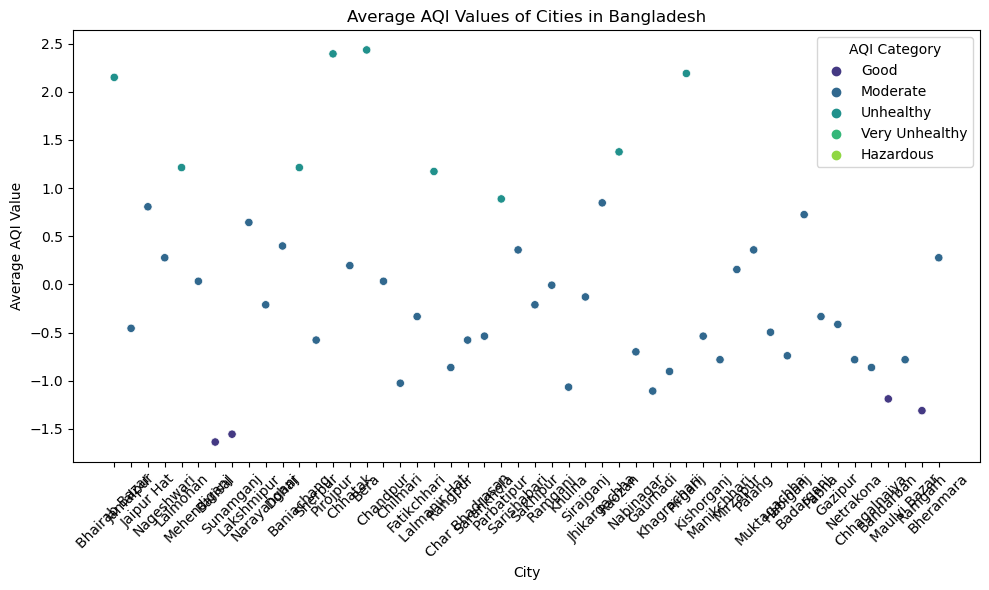

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# Feature selection
df = df[['Country', 'City', 'AQI Value']]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'AQI Value')

# Filter data for Bangladesh
df_bangladesh = df[df['Country'] == 'Bangladesh']

# Feature Engineering
# Calculate average AQI value per city
city_average_aqi = df_bangladesh.groupby('City')['AQI Value'].mean().reset_index()
city_average_aqi.columns = ['City', 'Average AQI Value']

# Create bins for AQI values
aqi_bins = [0, 50, 100, 150, 200, 300, float('inf')]
aqi_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df_bangladesh['AQI Category'] = pd.cut(df_bangladesh['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)

# Calculate additional statistical features
city_stats = df_bangladesh.groupby('City')['AQI Value'].agg(['min', 'max', 'std']).reset_index()
city_stats['AQI Range'] = city_stats['max'] - city_stats['min']
city_stats.columns = ['City', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']

# Merge the engineered features back into the main dataframe
df_bangladesh = pd.merge(df_bangladesh, city_average_aqi, on='City')
df_bangladesh = pd.merge(df_bangladesh, city_stats, on='City')

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df_bangladesh.select_dtypes(include='number').columns
df_bangladesh[num_cols] = scaler.fit_transform(df_bangladesh[num_cols])

scaler = StandardScaler()
num_cols = df_bangladesh.select_dtypes(include='number').columns
df_bangladesh[num_cols] = scaler.fit_transform(df_bangladesh[num_cols])

# Create scientific plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bangladesh, x='City', y='Average AQI Value', hue='AQI Category', palette='viridis')
plt.xlabel('City')
plt.ylabel('Average AQI Value')
plt.title('Average AQI Values of Cities in Bangladesh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
# using lag feature engineering

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# Feature selection
df = df[['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category']]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'AQI Value')

# Convert categorical variables into numeric variables using label encoding
label_encoder = LabelEncoder()
categorical_cols = ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Add the "Leg" feature
df['Leg'] = df['PM2.5 AQI Value'] / df['AQI Value']

# Print the updated DataFrame
print(df)


        Country      City  AQI Value  AQI Category  CO AQI Value  \
0      0.658667  0.704419  -0.186657      0.668442     -0.133114   
1     -1.427916  0.707684  -0.591615     -0.954560     -0.133114   
2     -0.364561  0.713182   0.420781      0.668442     -0.133114   
3      0.558351  0.718853  -0.875086     -0.954560     -0.133114   
4     -0.785890  0.730193  -1.361037     -0.954560     -1.427654   
...         ...       ...        ...           ...           ...   
23457  0.859300  0.108855   0.623261      0.668442     -0.133114   
23459 -0.785890  1.014057  -0.227152     -0.954560     -0.133114   
23460 -0.484941  0.247865  -0.227152     -0.954560     -0.133114   
23461  1.360883  1.607388   0.623261      0.668442     -0.133114   
23462 -0.003422  0.088235   0.582765      0.668442     -0.133114   

       CO AQI Category  Ozone AQI Value  Ozone AQI Category  NO2 AQI Value  \
0                  0.0         0.350991           -0.235889      -0.606905   
1                  0.0     

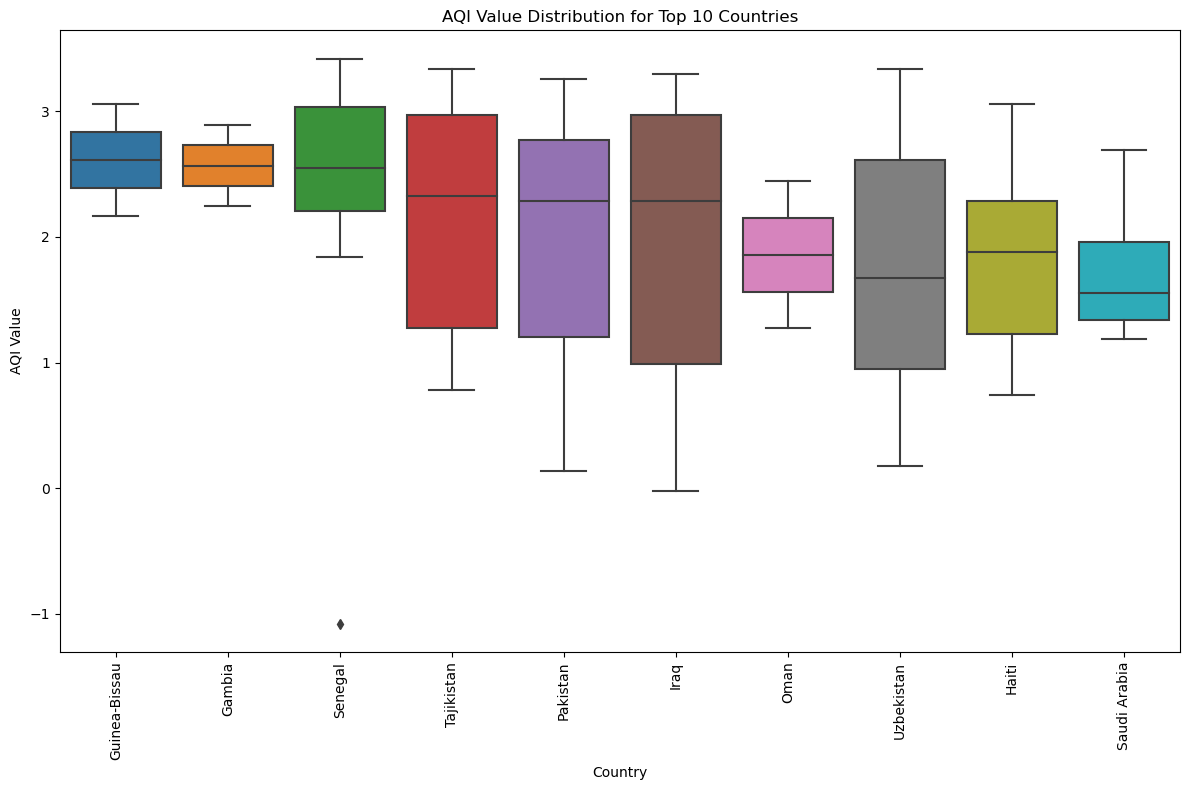

              Country              City  AQI Value  CO AQI Value  \
0  Russian Federation        Praskoveya  -0.186657     -0.133114   
1              Brazil  Presidente Dutra  -0.591615     -0.133114   
2               Italy   Priolo Gargallo   0.420781     -0.133114   
3              Poland         Przasnysz  -0.875086     -0.133114   
4              France          Punaauia  -1.361037     -1.427654   

   Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  AQI Category_Good  \
0         0.350991      -0.606905        -0.062073          -0.961839   
1        -1.581843      -0.385482        -0.436565           1.039675   
2         0.538039      -0.164058         0.499664          -0.961839   
3         0.226292      -0.606905        -1.222997           1.039675   
4        -0.521902      -0.606905        -1.747285           1.039675   

   AQI Category_Moderate  AQI Category_Unhealthy for Sensitive Groups  \
0               1.103881                                    -0.271603   
1     

In [1]:
#using rolling statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# Feature selection
df = df[['Country','City','AQI Value','AQI Category','CO AQI Value','CO AQI Category','Ozone AQI Value','Ozone AQI Category','NO2 AQI Value','NO2 AQI Category','PM2.5 AQI Value','PM2.5 AQI Category']]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'AQI Value')

# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'])

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df['AQI Value Rolling Mean'] = df['AQI Value'].rolling(window=7).mean()


top_10_countries = df.groupby('Country')['AQI Value'].mean().nlargest(10).index


df_top_10_countries = df[df['Country'].isin(top_10_countries)]


plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='AQI Value', data=df_top_10_countries, order=top_10_countries)
plt.xlabel('Country')
plt.ylabel('AQI Value')
plt.title('AQI Value Distribution for Top 10 Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(df.head())